# WRF-Chem Results Evaluation

## Libraries

In [1]:
%matplotlib inline
import pandas as pd
import os, fnmatch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib as mpl

# Import Data

### Observed data in CETESB and IAG stations

In [2]:
stations = pd.read_csv('../1_ObsData/stations.csv', comment='#') 
#                      encoding = "ISO-8859-1")
sites    = stations.loc[stations.domain=='d02',:].reset_index(drop=True)
types    = list(stations.type.unique())
print(types)
sub      = sites.loc[sites.type == types [0]].reset_index(drop=True)
ubr      = sites.loc[sites.type == types [1]].reset_index(drop=True)
upr      = sites.loc[sites.type == types [2]].reset_index(drop=True)
idt      = sites.loc[sites.type == types [3]].reset_index(drop=True)
fpr      = sites.loc[sites.type == types [4]].reset_index(drop=True)

['Regional urban', 'Urban', 'Urban park', 'Industry', 'Forest preservation']


In [3]:
stations

,name,lat,lon,code,type,domain,abb
0,Americana,-22.724253,-47.339549,290,Regional urban,d02,Ame
1,Araçatuba,-21.186841,-50.439317,107,Regional urban,d01,Ara
2,Araraquara,-21.782522,-48.185832,106,Regional urban,d02,Arrq
3,Bauru,-22.326608,-49.092759,108,Regional urban,d01,Bau
4,Cambuci,-23.567708,-46.612273,90,Urban,d02,Cmb
...,...,...,...,...,...,...,...
59,Sorocaba,-23.502427,-47.479030,67,Regional urban,d02,Srcb
60,Taboão da Serra,-23.609324,-46.758294,103,Urban,d02,TdS
61,Tatuí,-23.360752,-47.870799,256,Regional urban,d02,Tt
62,Taubaté,-23.032351,-45.575805,280,Regional urban,d02,Tbt


In [6]:
# Meteorological parameters observations
Dir = '../1_ObsData/SEP18/'

def readDat(files, path = '../1_ObsData/data/SEP18/',time_zone="America/Sao_Paulo"):
    Data = pd.DataFrame()
    for file in files:
        df = pd.read_csv(path + file)
        Data = pd.concat([Data,df])
    Data = Data[Data.code.isin(stations.code)]
    Data['station'] = [stations[stations.code == i].name.values[0] for i in Data.code]
    Data['type'] = [stations[stations.code == i].type.values[0] for i in Data.code]
    Data.loc[:,'date'] = pd.to_datetime(Data['date'], format='%Y-%m-%d %H:%M:%S')
    Data.loc[:,'local_date']=Data['date'].dt.tz_localize(time_zone)
    return Data

f18 = fnmatch.filter(os.listdir(Dir), 'all_met*.csv')
metObs = readDat(f18, path = Dir)

# Air quality parameters
f18 = fnmatch.filter(os.listdir(Dir), 'all_photo*.csv')
aqObs = readDat(f18, path = Dir)

In [7]:
Obs = pd.merge(metObs, aqObs)
Obs['nox']=Obs.no+Obs.no2
Obs[Obs.station == "IAG"]

,date,tc,rh,sr,ws,wd,code,station,type,local_date,o3,no,no2,co,nox
29561,2018-09-01 00:00:00,17.1,68.0,NaN,0.56,315.0,0,IAG,Forest preservation,2018-09-01 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN
29562,2018-09-01 01:00:00,16.5,70.0,NaN,0.56,315.0,0,IAG,Forest preservation,2018-09-01 01:00:00-03:00,NaN,NaN,NaN,NaN,NaN
29563,2018-09-01 02:00:00,16.0,83.0,NaN,0.28,315.0,0,IAG,Forest preservation,2018-09-01 02:00:00-03:00,NaN,NaN,NaN,NaN,NaN
29564,2018-09-01 03:00:00,15.9,87.0,NaN,0.00,315.0,0,IAG,Forest preservation,2018-09-01 03:00:00-03:00,NaN,NaN,NaN,NaN,NaN
29565,2018-09-01 04:00:00,15.9,88.0,NaN,0.28,315.0,0,IAG,Forest preservation,2018-09-01 04:00:00-03:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30276,2018-09-30 19:00:00,19.8,96.0,NaN,1.39,45.0,0,IAG,Forest preservation,2018-09-30 19:00:00-03:00,NaN,NaN,NaN,NaN,NaN
30277,2018-09-30 20:00:00,19.5,94.0,NaN,1.11,22.5,0,IAG,Forest preservation,2018-09-30 20:00:00-03:00,NaN,NaN,NaN,NaN,NaN
30278,2018-09-30 21:00:00,19.2,96.0,NaN,1.67,45.0,0,IAG,Forest preservation,2018-09-30 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN
30279,2018-09-30 22:00:00,19.0,97.0,NaN,1.67,22.5,0,IAG,Forest preservation,2018-09-30 22:00:00-03:00,NaN,NaN,NaN,NaN,NaN


In [167]:
Obs_2 = Obs
start_remove = pd.to_datetime('2018-09-14').tz_localize('America/Sao_Paulo')
end_remove = pd.to_datetime('2018-09-16').tz_localize('America/Sao_Paulo')
Obs_2 = Obs_2.loc[(Obs_2.local_date < start_remove) | (Obs_2.local_date > end_remove)]
Obs_2

,date,tc,rh,sr,ws,wd,code,station,type,local_date,o3,no,no2,co,nox
0,2018-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó,Urban,2018-09-01 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN
1,2018-09-01 01:00:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó,Urban,2018-09-01 01:00:00-03:00,0.0,NaN,NaN,NaN,NaN
2,2018-09-01 02:00:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó,Urban,2018-09-01 02:00:00-03:00,0.0,NaN,NaN,NaN,NaN
3,2018-09-01 03:00:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó,Urban,2018-09-01 03:00:00-03:00,0.0,NaN,NaN,NaN,NaN
4,2018-09-01 04:00:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó,Urban,2018-09-01 04:00:00-03:00,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46138,2018-09-30 20:00:00,NaN,NaN,NaN,NaN,NaN,236,S.Miguel Paulista,Urban,2018-09-30 20:00:00-03:00,NaN,NaN,NaN,NaN,NaN
46139,2018-09-30 21:00:00,NaN,NaN,NaN,NaN,NaN,236,S.Miguel Paulista,Urban,2018-09-30 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN
46140,2018-09-30 22:00:00,NaN,NaN,NaN,NaN,NaN,236,S.Miguel Paulista,Urban,2018-09-30 22:00:00-03:00,NaN,NaN,NaN,NaN,NaN
46141,2018-09-30 23:00:00,NaN,NaN,NaN,NaN,NaN,236,S.Miguel Paulista,Urban,2018-09-30 23:00:00-03:00,NaN,NaN,NaN,NaN,NaN


In [173]:
(Obs_2.loc[Obs_2.station == 'Ibirapuera'].set_index('local_date')).iloc[310:320,:]

,date,tc,rh,sr,ws,wd,code,station,type,o3,no,no2,co,nox
local_date,,,,,,,,,,,,,,
2018-09-13 22:00:00-03:00,2018-09-13 22:00:00,NaN,NaN,NaN,NaN,NaN,83,Ibirapuera,Urban park,70.0,0.0,15.0,0.2,15.0
2018-09-13 23:00:00-03:00,2018-09-13 23:00:00,NaN,NaN,NaN,NaN,NaN,83,Ibirapuera,Urban park,56.0,0.0,16.0,0.2,16.0
2018-09-16 01:00:00-03:00,2018-09-16 01:00:00,NaN,NaN,NaN,NaN,NaN,83,Ibirapuera,Urban park,52.0,NaN,NaN,0.2,NaN
2018-09-16 02:00:00-03:00,2018-09-16 02:00:00,NaN,NaN,NaN,NaN,NaN,83,Ibirapuera,Urban park,51.0,0.0,4.0,0.1,4.0
2018-09-16 03:00:00-03:00,2018-09-16 03:00:00,NaN,NaN,NaN,NaN,NaN,83,Ibirapuera,Urban park,55.0,0.0,2.0,0.1,2.0
2018-09-16 04:00:00-03:00,2018-09-16 04:00:00,NaN,NaN,NaN,NaN,NaN,83,Ibirapuera,Urban park,52.0,0.0,2.0,0.1,2.0
2018-09-16 05:00:00-03:00,2018-09-16 05:00:00,NaN,NaN,NaN,NaN,NaN,83,Ibirapuera,Urban park,51.0,0.0,2.0,NaN,2.0
2018-09-16 06:00:00-03:00,2018-09-16 06:00:00,NaN,NaN,NaN,NaN,NaN,83,Ibirapuera,Urban park,NaN,0.0,2.0,0.1,2.0
2018-09-16 07:00:00-03:00,2018-09-16 07:00:00,NaN,NaN,NaN,NaN,NaN,83,Ibirapuera,Urban park,54.0,0.0,2.0,0.1,2.0


In [174]:
Obs_dic = {}
for code in sites.code:
    Obs_dic[sites.name[sites.code == code].values[0]] = (Obs_2[Obs_2.code==code])
Obs_dic

{'Americana':                      date  tc  rh  sr  ws  wd  code    station  \
 31002 2018-09-01 00:00:00 NaN NaN NaN NaN NaN   290  Americana   
 31003 2018-09-01 01:00:00 NaN NaN NaN NaN NaN   290  Americana   
 31004 2018-09-01 02:00:00 NaN NaN NaN NaN NaN   290  Americana   
 31005 2018-09-01 03:00:00 NaN NaN NaN NaN NaN   290  Americana   
 31006 2018-09-01 04:00:00 NaN NaN NaN NaN NaN   290  Americana   
 ...                   ...  ..  ..  ..  ..  ..   ...        ...   
 31718 2018-09-30 20:00:00 NaN NaN NaN NaN NaN   290  Americana   
 31719 2018-09-30 21:00:00 NaN NaN NaN NaN NaN   290  Americana   
 31720 2018-09-30 22:00:00 NaN NaN NaN NaN NaN   290  Americana   
 31721 2018-09-30 23:00:00 NaN NaN NaN NaN NaN   290  Americana   
 31722 2018-10-01 00:00:00 NaN NaN NaN NaN NaN   290  Americana   
 
                  type                local_date    o3  no  no2  co  nox  
 31002  Regional urban 2018-09-01 00:00:00-03:00   NaN NaN  NaN NaN  NaN  
 31003  Regional urban 2018-09-

{'Regional urban':                                          date         station         tc  \
 local_date                                                                 
 2018-09-01 00:00:00-03:00 2018-09-01 00:00:00  Regional urban        NaN   
 2018-09-01 01:00:00-03:00 2018-09-01 01:00:00  Regional urban  20.673684   
 2018-09-01 02:00:00-03:00 2018-09-01 02:00:00  Regional urban  20.147368   
 2018-09-01 03:00:00-03:00 2018-09-01 03:00:00  Regional urban  19.633333   
 2018-09-01 04:00:00-03:00 2018-09-01 04:00:00  Regional urban  18.968421   
 ...                                       ...             ...        ...   
 2018-09-30 20:00:00-03:00 2018-09-30 20:00:00  Regional urban  21.121053   
 2018-09-30 21:00:00-03:00 2018-09-30 21:00:00  Regional urban  21.005263   
 2018-09-30 22:00:00-03:00 2018-09-30 22:00:00  Regional urban  20.742105   
 2018-09-30 23:00:00-03:00 2018-09-30 23:00:00  Regional urban  20.557895   
 2018-10-01 00:00:00-03:00 2018-10-01 00:00:00  Regional u

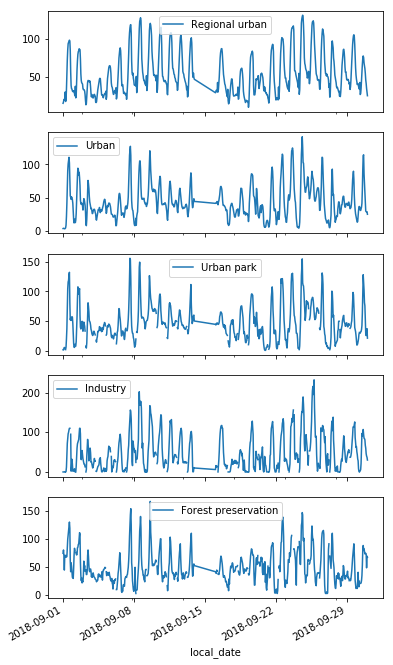

In [188]:
df_types = Obs_2.groupby(['date', 'local_date','type']).mean().reset_index().set_index('local_date')
df_types.rename(columns={'type':'station'}, inplace=True)
fig, ax = plt.subplots(len(types),1, sharex=True, figsize=(6,12))
for i in range(len(types)):
    df_types[df_types.station == types[i]].o3.plot(label=types[i], ax=ax[i])
    ax[i].legend()
Obs_dic_class = {}
for t in types:
    Obs_dic_class[t] = (df_types[df_types.station==t])
Obs_dic_class

## WRF-Chem Results from meteorological IC/LBC from NCEP FInal Analysis (ds083.2)

In [12]:
Dir = '../3_Results/SEP18/wrfout/'
f18 = fnmatch.filter(os.listdir(Dir), '*FIN_d02*')

def readMod(files, path = '../3_Results/SEP18/wrfout/',time_zone="America/Sao_Paulo"):
    Data = pd.DataFrame()
    for file in files:
        df = pd.read_csv(path + file)
        Data = pd.concat([Data,df])
    Data = Data[Data.code.isin(stations.code)]
    Data['station'] = [stations[stations.code == i].name.values[0] for i in Data.code]
    Data['type'] = [stations[stations.code == i].type.values[0] for i in Data.code]
    Data.loc[:,'local_date'] = pd.to_datetime(Data['local_date'], format='%Y-%m-%d %H:%M:%S')
    Data.loc[:,'local_date']=Data['local_date'].dt.tz_convert(time_zone)
    return Data

Mod = readMod(f18, path = Dir)
Mod.rename(columns={'name':'station'})
Mod = Mod[['local_date','code','type','station','tc','rh','ws','wd','o3','no','no2','co']]
Mod['nox'] = Mod.no+Mod.no2
Mod.head()

,local_date,code,type,station,tc,rh,ws,wd,o3,no,no2,co,nox
0,2018-08-31 21:00:00-03:00,262,Urban,Interlagos,24.039398,44.973213,1.808540,100.971790,55.151814,0.245534,46.778633,0.366261,47.024167
1,2018-08-31 22:00:00-03:00,262,Urban,Interlagos,23.545746,45.878780,2.023651,69.439560,42.120228,0.396465,53.440815,0.406778,53.837280
2,2018-08-31 23:00:00-03:00,262,Urban,Interlagos,22.845520,48.673122,2.517935,52.084282,2.454763,8.831941,83.588560,0.602246,92.420501
3,2018-09-01 00:00:00-03:00,262,Urban,Interlagos,22.051086,51.513958,2.341101,37.953480,0.903574,14.132110,77.910170,0.601828,92.042280
4,2018-09-01 01:00:00-03:00,262,Urban,Interlagos,21.522858,52.689655,2.308673,48.118988,3.889594,7.021801,71.327805,0.511218,78.349606


Join all stations by name in dictionary format

In [14]:
Mod_dic = {}
for code in sites.code:
    Mod_dic[sites.name[sites.code == code].values[0]] = (Mod[Mod.code==code])
Mod_dic

{'Americana':                    local_date  code            type    station         tc  \
 0   2018-08-31 21:00:00-03:00   290  Regional urban  Americana  26.423370   
 1   2018-08-31 22:00:00-03:00   290  Regional urban  Americana  25.210297   
 2   2018-08-31 23:00:00-03:00   290  Regional urban  Americana  24.284729   
 3   2018-09-01 00:00:00-03:00   290  Regional urban  Americana  23.880402   
 4   2018-09-01 01:00:00-03:00   290  Regional urban  Americana  23.177551   
 ..                        ...   ...             ...        ...        ...   
 716 2018-09-30 17:00:00-03:00   290  Regional urban  Americana  27.458770   
 717 2018-09-30 18:00:00-03:00   290  Regional urban  Americana  27.586914   
 718 2018-09-30 19:00:00-03:00   290  Regional urban  Americana  26.873627   
 719 2018-09-30 20:00:00-03:00   290  Regional urban  Americana  26.131805   
 720 2018-09-30 21:00:00-03:00   290  Regional urban  Americana  25.490600   
 
             rh        ws          wd         o3 

Join all stations as type

In [53]:
df_types = Mod.groupby(['local_date','type']).mean().reset_index().set_index('local_date')
df_types.rename(columns={'type':'station'}, inplace=True)
Mod_dic_class = {}
for t in types:
    Mod_dic_class[t] = (df_types[df_types.station==t])
Mod_dic_class

{'Regional urban':                                   station        code         tc         rh  \
 local_date                                                                    
 2018-08-31 21:00:00-03:00  Regional urban  201.210526  25.635678  38.293203   
 2018-08-31 22:00:00-03:00  Regional urban  201.210526  24.790280  40.403722   
 2018-08-31 23:00:00-03:00  Regional urban  201.210526  24.060788  42.575615   
 2018-09-01 00:00:00-03:00  Regional urban  201.210526  23.415490  45.112556   
 2018-09-01 01:00:00-03:00  Regional urban  201.210526  22.795174  47.078543   
 ...                                   ...         ...        ...        ...   
 2018-09-30 17:00:00-03:00  Regional urban  201.210526  26.040137  66.573985   
 2018-09-30 18:00:00-03:00  Regional urban  201.210526  25.193067  71.234835   
 2018-09-30 19:00:00-03:00  Regional urban  201.210526  24.877315  72.609085   
 2018-09-30 20:00:00-03:00  Regional urban  201.210526  24.398317  75.271202   
 2018-09-30 21:00:00-0

## Join Obs and Mod as data

By station:

In [175]:
data = pd.merge(Obs_2, Mod, 
                on=['local_date','station','code','type'],
                suffixes=('_obs', '_mod'))
#data.dropna(how='any',inplace=True)
data.head()

,date,tc_obs,rh_obs,sr,ws_obs,wd_obs,code,station,type,local_date,...,nox_obs,tc_mod,rh_mod,ws_mod,wd_mod,o3_mod,no_mod,no2_mod,co_mod,nox_mod
0,2018-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó,Urban,2018-09-01 00:00:00-03:00,...,NaN,23.298310,44.076140,2.693815,7.026842,50.255024,0.286471,21.599024,0.218526,21.885495
1,2018-09-01 01:00:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó,Urban,2018-09-01 01:00:00-03:00,...,NaN,22.410126,48.023920,2.216470,6.119945,45.791298,0.361579,22.468180,0.213519,22.829759
2,2018-09-01 02:00:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó,Urban,2018-09-01 02:00:00-03:00,...,NaN,21.407288,52.332270,1.305349,50.996380,32.585240,0.666727,36.497500,0.275478,37.164227
3,2018-09-01 03:00:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó,Urban,2018-09-01 03:00:00-03:00,...,NaN,20.983826,53.653320,1.469841,60.283295,31.738413,0.725860,36.942380,0.271991,37.668240
4,2018-09-01 04:00:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó,Urban,2018-09-01 04:00:00-03:00,...,NaN,21.093628,51.141346,2.060035,22.507019,38.030530,0.590194,29.836330,0.231959,30.426524


By type of station:

In [176]:
df_all = data.groupby(['local_date','date','type']).mean().reset_index().drop(['code'], axis=1)
df_all

,local_date,date,type,tc_obs,rh_obs,sr,ws_obs,wd_obs,o3_obs,no_obs,...,nox_obs,tc_mod,rh_mod,ws_mod,wd_mod,o3_mod,no_mod,no2_mod,co_mod,nox_mod
0,2018-09-01 00:00:00-03:00,2018-09-01 00:00:00,Forest preservation,17.100000,68.000000,NaN,0.560000,315.000000,NaN,NaN,...,NaN,19.716126,57.706192,2.272731,35.772157,25.561151,7.255070,46.938202,0.396064,54.193272
1,2018-09-01 00:00:00-03:00,2018-09-01 00:00:00,Industry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,23.053375,48.130075,3.107012,55.837108,47.140047,0.156004,14.116083,0.158278,14.272087
2,2018-09-01 00:00:00-03:00,2018-09-01 00:00:00,Regional urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,23.415490,45.112556,1.931973,65.860666,50.079266,0.093864,13.604209,0.172993,13.698073
3,2018-09-01 00:00:00-03:00,2018-09-01 00:00:00,Urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,21.855541,50.379847,1.840301,61.386983,21.167463,3.932035,52.046831,0.395759,55.978866
4,2018-09-01 00:00:00-03:00,2018-09-01 00:00:00,Urban park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,21.930962,48.586748,1.750065,38.420142,9.513958,9.409111,70.065726,0.525202,79.474837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3340,2018-09-30 21:00:00-03:00,2018-09-30 21:00:00,Forest preservation,18.600000,97.500000,NaN,1.485000,65.500000,73.000000,0.000000,...,4.000000,22.223725,82.800080,1.716555,23.506740,42.703151,0.604109,37.650381,0.293784,38.254490
3341,2018-09-30 21:00:00-03:00,2018-09-30 21:00:00,Industry,22.350000,84.500000,0.000000,1.200000,91.000000,46.000000,1.000000,...,19.500000,23.804229,82.686410,1.460792,136.425624,54.077343,0.117308,15.284200,0.166498,15.401508
3342,2018-09-30 21:00:00-03:00,2018-09-30 21:00:00,Regional urban,21.008333,90.090909,0.000000,0.800000,277.250000,38.571429,0.833333,...,21.000000,23.917972,77.983913,1.456634,130.039575,60.828956,0.124321,14.815099,0.167789,14.939420
3343,2018-09-30 21:00:00-03:00,2018-09-30 21:00:00,Urban,19.922222,93.666667,0.333333,1.438462,84.307692,29.058824,8.071429,...,57.714286,23.637132,76.995144,1.932128,128.630651,42.196587,0.624056,40.213998,0.311520,40.838054


## Statistical Evaluation
The Mod_statistic script was built by Mario Gavidia and with few changes done by me. Here you see the follow functions:
```python
* all_aqs_all_vars(model_dic, obs_dic, to_df=True, sort_pol=False, csv=False)
* all_aqs_some_vars(model_dic, obs_dic, var, to_df=True, sort_pol=False, csv=False)
* all_stats(model_df, obs_df, var, to_df=False)
* all_var_stats_per_station(model_df, obs_df, para=['o3', 'co', 'nox', 'tc', 'ws', 'rh'], to_df=False)
* complete_cases(model_df, obs_df, var)
* global_stat(model_dic, obs_dic, csv=False)
* global_stat_some_vars(model_dic, obs_dic, var, csv=False)
* mean_bias(model_df, obs_df, var)
* mean_gross_error(model_df, obs_df, var)
* normalized_mean_bias(model_df, obs_df, var)
* normalized_mean_error(model_df, obs_df, var)
* root_mean_square_error(model_df, obs_df, var)
* some_vars_stats_per_station(model_df, obs_df, var, to_df=False)
* wind_dir_diff(Mi, Oi)
* wind_dir_mage(model_df, obs_df, wd_name='wd')
* wind_dir_mb(model_df, obs_df, wd_name='wd')
* mod_Stats(data, polls=['o3', 'no', 'no2', 'co', 'tc', 'rh'])
```

In [55]:
import mod_stats as ms
help(ms)

Help on module mod_stats:

NAME
    mod_stats

DESCRIPTION
    Modified by Alejandro Delgado
    Original script from Mario Gavidia
    Source from Emery et al. (2017)

FUNCTIONS
    all_aqs_all_vars(model_dic, obs_dic, to_df=True, sort_pol=False, csv=False)
        Calculate all statistic for all variables for all
        evaluated stations
        
        Parameters
        ----------
        model_dic : dict
            Dictionaryy containing data frames with station data from model.
        obs_dic : dict
            Dictionaryy containing data frames with station data from aqs.
        to_df : bool, optional
            Return a data frame. The default is True.
        sort_pol : bool, optional
            when to_df=True output sorted by pol. The default is False.
        csv : bool, optional
            When to_df=Truem export it to csv. The default is False.
        
        Returns
        -------
        result : pandas DataFrame or dict
            All statistic for all var

The function mod_Stats considers each station

In [84]:
data.type.unique()

array(['Urban', 'Urban park', 'Regional urban', 'Industry',
       'Forest preservation'], dtype=object)

By station and hourly data:

In [177]:
mod_Stats(data,polls=['o3', 'no', 'no2', 'nox','co', 'tc', 'rh'])
# data[data.type.isin(['Regional urban','Industry','Urban','Urban park'])]

,n,MB,MGE,RMSE,NMB,NME,r,Obs SD,Mod SD
o3,23849,-15.49,24.20,30.46,31.95,49.92,0.62,31.38,28.87
no,21631,6.88,7.85,21.55,-81.53,93.05,0.25,20.99,3.34
no2,21631,9.63,16.17,22.74,-36.67,61.61,0.36,19.99,15.88
nox,21631,16.50,23.35,38.85,-47.58,67.32,0.34,36.92,17.91
co,9805,0.26,0.29,0.40,-52.41,59.39,0.19,0.31,0.12
tc,17595,-1.57,2.04,2.65,7.76,10.04,0.91,5.24,4.88
rh,17050,8.25,11.71,15.30,-11.47,16.28,0.79,20.10,19.56


By type station and average by type:

In [178]:
mod_Stats(df_all,polls=['o3', 'no', 'no2', 'nox','co', 'tc', 'rh']).sort_values(by='r', ascending=False)

,n,MB,MGE,RMSE,NMB,NME,r,Obs SD,Mod SD
tc,3337,-1.66,1.99,2.50,8.36,9.99,0.93,5.18,4.83
rh,3337,8.91,11.25,14.56,-12.07,15.25,0.83,19.86,19.19
o3,3221,-14.56,23.53,29.09,29.55,47.74,0.67,32.78,28.46
no,3306,4.91,5.95,13.24,-76.04,92.23,0.27,12.76,2.73
nox,3306,13.08,21.11,29.51,-40.77,65.81,0.27,25.70,16.19
no2,3306,8.17,15.70,20.29,-31.89,61.27,0.26,15.91,14.58
co,1948,0.21,0.23,0.30,-49.11,55.28,0.21,0.21,0.10


Statistical results for each station:

In [179]:
ms.all_aqs_all_vars(Mod_dic,Obs_dic, to_df=True).dropna().round(2).sort_values(by='R', ascending=False)

,MB,ME,RMSE,NMB,NME,R,Om,Mm,Ostd,Mstd,aqs
tc,1.49,1.94,2.43,7.31,9.53,0.93,20.36,21.85,5.29,4.76,Jundiaí
tc,1.13,1.83,2.35,5.02,8.09,0.93,22.62,23.78,5.53,4.73,Paulínia
tc,1.43,1.90,2.41,6.76,8.95,0.93,21.22,22.66,5.18,4.50,Sorocaba
tc,0.91,1.91,2.42,4.10,8.58,0.93,22.22,23.14,5.98,5.08,Santa Gertrudes
tc,1.73,2.13,2.63,7.96,9.76,0.93,21.78,23.52,5.36,4.70,Campinas-V.União
...,...,...,...,...,...,...,...,...,...,...,...
co,-0.46,0.46,0.52,-73.48,73.48,0.05,0.63,0.17,0.23,0.06,Campinas-Centro
co,-0.37,0.39,0.52,-59.09,62.38,0.02,0.62,0.26,0.36,0.12,Marg.Tietê-Pte Remédios
co,-0.46,0.48,0.59,-62.60,65.28,0.00,0.74,0.28,0.34,0.14,Congonhas
co,-0.19,0.26,0.36,-40.92,57.01,-0.02,0.46,0.28,0.27,0.14,Cerqueira César


In [180]:
o3_stats = ms.all_aqs_some_vars(Mod_dic,Obs_dic, 
                     var=['o3'], 
                     to_df=True, 
                     sort_pol=True, 
                     csv=False).dropna().round(2).sort_values(by='R',ascending=False)
o3_stats

,MB,ME,RMSE,NMB,NME,R,Om,Mm,Ostd,Mstd,aqs
o3,19.71,31.38,36.60,38.91,61.95,0.78,50.65,69.18,46.19,25.70,Paulínia
o3,15.68,26.14,30.24,28.71,47.87,0.76,54.61,69.41,38.49,23.50,Piracicaba
o3,16.71,24.25,30.22,32.81,47.60,0.75,50.94,66.42,37.91,27.54,Jundiaí
o3,24.58,25.49,30.09,52.12,54.05,0.75,47.16,70.37,25.00,24.14,Campinas-V.União
o3,7.78,20.08,25.64,12.53,32.33,0.73,62.11,68.56,35.50,22.55,Campinas-Taquaral
o3,11.88,25.51,30.33,19.39,41.63,0.72,61.27,72.17,39.59,23.21,Americana
o3,14.62,24.60,28.56,25.69,43.23,0.72,56.92,69.01,34.71,21.74,Limeira
o3,31.58,32.55,37.50,78.36,80.76,0.70,40.30,70.63,26.43,25.92,Sorocaba
o3,14.28,22.72,29.68,28.56,45.46,0.70,49.98,63.20,28.98,35.93,Pico do Jaraguá
o3,16.64,25.43,32.55,39.36,60.15,0.69,42.28,58.19,32.58,37.07,Santana


Emery et al. (2017) considers a satisfied model when its results comply statistical benchmark:

Parameter |   Goal   |  Criteria  |
--------- |----------|----------- |
NMB | <5% | <15%
NME | <15% | <25%
r | >0.75 | >0.5

In [181]:
o3_stats[(o3_stats.R > 0.5) & (o3_stats.NMB <15) & (o3_stats.NME < 25)]

,MB,ME,RMSE,NMB,NME,R,Om,Mm,Ostd,Mstd,aqs


In [182]:
o3_stats[(o3_stats.R > 0.5) & (o3_stats.NMB <15) | (o3_stats.NME < 25)]

,MB,ME,RMSE,NMB,NME,R,Om,Mm,Ostd,Mstd,aqs
o3,7.78,20.08,25.64,12.53,32.33,0.73,62.11,68.56,35.50,22.55,Campinas-Taquaral
o3,6.83,22.85,29.28,13.28,44.45,0.67,51.40,56.36,33.11,36.62,Ibirapuera
o3,1.15,23.27,27.87,1.75,35.46,0.65,65.63,65.62,34.99,14.47,Araraquara
o3,5.54,18.83,24.27,9.13,31.05,0.56,60.66,66.22,28.43,17.90,Mogi das Cruzes


In [183]:
o3_stats[(o3_stats.R > 0.75) | (o3_stats.NMB <15) | (o3_stats.NME < 25)]

,MB,ME,RMSE,NMB,NME,R,Om,Mm,Ostd,Mstd,aqs
o3,19.71,31.38,36.60,38.91,61.95,0.78,50.65,69.18,46.19,25.70,Paulínia
o3,15.68,26.14,30.24,28.71,47.87,0.76,54.61,69.41,38.49,23.50,Piracicaba
o3,7.78,20.08,25.64,12.53,32.33,0.73,62.11,68.56,35.50,22.55,Campinas-Taquaral
o3,6.83,22.85,29.28,13.28,44.45,0.67,51.40,56.36,33.11,36.62,Ibirapuera
o3,1.15,23.27,27.87,1.75,35.46,0.65,65.63,65.62,34.99,14.47,Araraquara
o3,5.54,18.83,24.27,9.13,31.05,0.56,60.66,66.22,28.43,17.90,Mogi das Cruzes


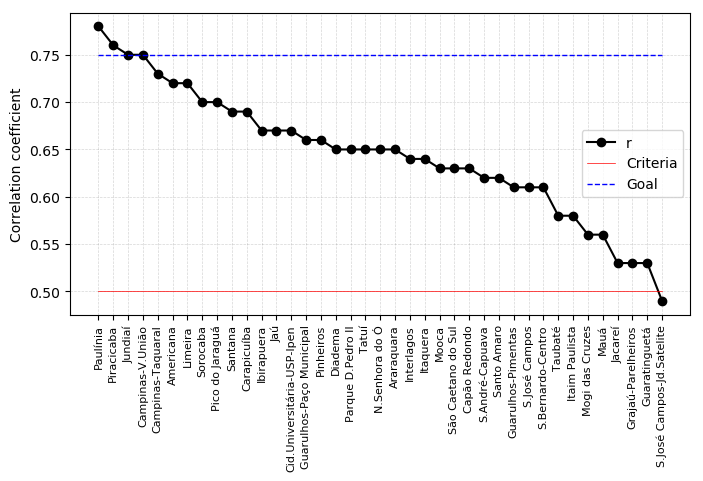

In [197]:
fig = plt.figure(figsize=(8,4), dpi=100)
plt.plot(o3_stats.aqs,o3_stats.R,'ko-', label='r')
plt.plot(o3_stats.aqs,[0.5 for i in o3_stats.aqs],'r-', label='Criteria', lw=0.5)
plt.plot(o3_stats.aqs,[0.75 for i in o3_stats.aqs],'b--', label='Goal', lw=1)
plt.xticks(o3_stats.aqs, rotation='vertical', fontsize=8)
plt.ylabel('Correlation coefficient')
plt.legend()
plt.grid(color='0.2', ls='--', lw=0.5,alpha=0.2);


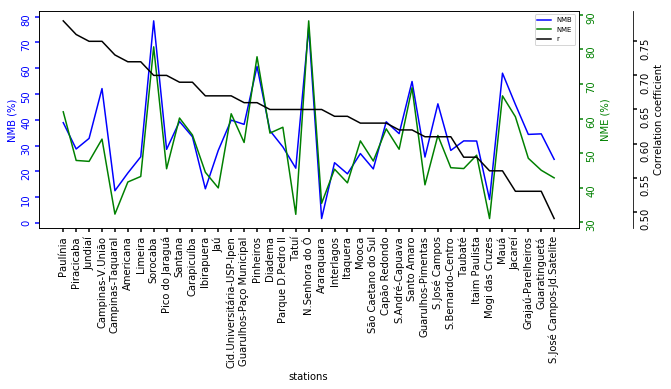

In [219]:
x = o3_stats.aqs

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize=(12,4))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(x, o3_stats.NMB, "b-", label="NMB")
p2, = par1.plot(x, o3_stats.NME, "g-", label="NME")
p3, = par2.plot(x, o3_stats.R, "k-", label="r")

#host.set_xlim(0, 2)
#host.set_ylim(12, 30)
#par1.set_ylim(0, 1)
#par2.set_ylim(0, 10)

host.set_xlabel("stations")
host.set_ylabel("NMB (%)")
par1.set_ylabel("NME (%)")
par2.set_ylabel("Correlation coefficient")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5, labelrotation=90)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines],loc=0, fontsize='x-small');
fig.savefig('./fig/o3_stats_station.pdf',bbox_inches='tight');

Statistical results by type, considering stations average by type:

In [220]:
ms.all_aqs_all_vars(Mod_dic_class,Obs_dic_class, to_df=True, sort_pol=True).dropna().round(2).sort_values(by=['R','aqs'], ascending=False)

,MB,ME,RMSE,NMB,NME,R,Om,Mm,Ostd,Mstd,aqs
tc,1.02,1.77,2.26,4.55,7.90,0.94,22.44,23.46,5.73,4.87,Industry
tc,2.11,2.18,2.66,11.91,12.32,0.93,17.68,19.78,4.38,4.56,Forest preservation
tc,1.32,1.71,2.28,6.82,8.82,0.91,19.37,20.70,4.54,4.45,Urban
tc,1.98,2.20,2.83,10.64,11.77,0.90,18.65,20.66,4.54,4.52,Urban park
rh,-6.59,10.68,13.96,-10.17,16.49,0.86,64.78,58.17,24.34,20.48,Industry
rh,-9.60,10.96,14.22,-11.82,13.51,0.82,81.19,71.59,16.64,18.26,Forest preservation
rh,-6.22,9.81,13.05,-8.38,13.22,0.77,74.19,67.95,16.17,17.27,Urban
o3,19.82,32.58,37.88,39.13,64.31,0.77,50.65,69.48,46.19,22.33,Industry
rh,-11.84,13.50,17.49,-14.84,16.92,0.74,79.82,67.99,17.66,17.90,Urban park
o3,14.45,21.47,26.85,32.32,48.03,0.70,44.71,59.10,25.88,31.18,Urban


In [221]:
ms.global_stat(Mod_dic_class, Obs_dic_class, csv=False).round(2)

,MB,ME,RMSE,NMB,NME,R,Om,Mm,Ostd,Mstd
o3,14.17,24.32,30.30,29.25,50.20,0.66,48.44,61.68,33.71,30.67
co,-0.18,0.22,0.29,-42.18,51.18,0.26,0.42,0.22,0.24,0.10
nox,-13.71,23.64,32.28,-38.80,66.90,0.20,35.33,21.78,27.37,17.04
tc,1.61,1.96,2.52,8.23,10.05,0.93,19.54,21.15,5.14,4.80
ws,1.39,1.57,1.92,79.35,89.71,0.40,1.75,3.13,0.82,1.43
rh,-8.56,11.24,14.77,-11.41,14.98,0.81,74.99,66.43,20.05,19.17


In [222]:
ms.global_stat(Mod_dic, Obs_dic, csv=False).round(2)

,MB,ME,RMSE,NMB,NME,R,Om,Mm,Ostd,Mstd
o3,15.49,24.20,30.46,31.95,49.92,0.62,48.48,62.30,31.38,30.18
co,-0.26,0.29,0.40,-52.41,59.39,0.19,0.49,0.21,0.31,0.11
nox,-16.50,23.35,38.85,-47.58,67.32,0.34,34.68,19.34,36.92,18.32
tc,1.57,2.04,2.65,7.76,10.04,0.91,20.30,21.57,5.24,4.82
ws,1.15,1.54,1.93,58.18,77.91,0.40,1.97,3.06,1.09,1.56
rh,-8.25,11.71,15.30,-11.47,16.28,0.79,71.93,64.67,20.10,19.42


In [191]:
ms.global_stat_some_vars(Mod_dic_class, Obs_dic_class, var=['o3','co','nox'], csv=False).round(2)

,MB,ME,RMSE,NMB,NME,R,Om,Mm,Ostd,Mstd
o3,14.17,24.32,30.30,29.25,50.20,0.66,48.44,61.68,33.71,30.67
co,-0.18,0.22,0.29,-42.18,51.18,0.26,0.42,0.22,0.24,0.10
nox,-13.71,23.64,32.28,-38.80,66.90,0.20,35.33,21.78,27.37,17.04


In [192]:
ms.global_stat_some_vars(Mod_dic_class, Obs_dic_class, var=['tc','rh','ws','wd'], csv=False).round(2)

,MB,ME,RMSE,NMB,NME,R,Om,Mm,Ostd,Mstd
tc,1.61,1.96,2.52,8.23,10.05,0.93,19.54,21.15,5.14,4.80
rh,-8.56,11.24,14.77,-11.41,14.98,0.81,74.99,66.43,20.05,19.17
ws,1.39,1.57,1.92,79.35,89.71,0.40,1.75,3.13,0.82,1.43
wd,-17.50,54.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
df_all = data.groupby(['local_date','date','type']).mean().reset_index()
df_all

,local_date,date,type,tc_obs,rh_obs,sr,ws_obs,wd_obs,code,o3_obs,...,nox_obs,tc_mod,rh_mod,ws_mod,wd_mod,o3_mod,no_mod,no2_mod,co_mod,nox_mod
0,2018-09-01 00:00:00-03:00,2018-09-01 00:00:00,Forest preservation,17.100000,68.000000,NaN,0.560000,315.000000,142.000000,NaN,...,NaN,19.716126,57.706192,2.272731,35.772157,25.561151,7.255070,46.938202,0.396064,54.193272
1,2018-09-01 00:00:00-03:00,2018-09-01 00:00:00,Industry,NaN,NaN,NaN,NaN,NaN,195.000000,NaN,...,NaN,23.053375,48.130075,3.107012,55.837108,47.140047,0.156004,14.116083,0.158278,14.272087
2,2018-09-01 00:00:00-03:00,2018-09-01 00:00:00,Regional urban,NaN,NaN,NaN,NaN,NaN,201.210526,NaN,...,NaN,23.415490,45.112556,1.931973,65.860666,50.079266,0.093864,13.604209,0.172993,13.698073
3,2018-09-01 00:00:00-03:00,2018-09-01 00:00:00,Urban,NaN,NaN,NaN,NaN,NaN,148.833333,NaN,...,NaN,21.855541,50.379847,1.840301,61.386983,21.167463,3.932035,52.046831,0.395759,55.978866
4,2018-09-01 00:00:00-03:00,2018-09-01 00:00:00,Urban park,NaN,NaN,NaN,NaN,NaN,136.000000,NaN,...,NaN,21.930962,48.586748,1.750065,38.420142,9.513958,9.409111,70.065726,0.525202,79.474837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3340,2018-09-30 21:00:00-03:00,2018-09-30 21:00:00,Forest preservation,18.600000,97.500000,NaN,1.485000,65.500000,142.000000,73.000000,...,4.000000,22.223725,82.800080,1.716555,23.506740,42.703151,0.604109,37.650381,0.293784,38.254490
3341,2018-09-30 21:00:00-03:00,2018-09-30 21:00:00,Industry,22.350000,84.500000,0.000000,1.200000,91.000000,195.000000,46.000000,...,19.500000,23.804229,82.686410,1.460792,136.425624,54.077343,0.117308,15.284200,0.166498,15.401508
3342,2018-09-30 21:00:00-03:00,2018-09-30 21:00:00,Regional urban,21.008333,90.090909,0.000000,0.800000,277.250000,201.210526,38.571429,...,21.000000,23.917972,77.983913,1.456634,130.039575,60.828956,0.124321,14.815099,0.167789,14.939420
3343,2018-09-30 21:00:00-03:00,2018-09-30 21:00:00,Urban,19.922222,93.666667,0.333333,1.438462,84.307692,148.833333,29.058824,...,57.714286,23.637132,76.995144,1.932128,128.630651,42.196587,0.624056,40.213998,0.311520,40.838054


In [31]:
df_1=data.loc[data.station=='Ibirapuera',:]
df_1

,date,tc_obs,rh_obs,sr,ws_obs,wd_obs,code,station,type,local_date,...,nox_obs,tc_mod,rh_mod,ws_mod,wd_mod,o3_mod,no_mod,no2_mod,co_mod,nox_mod
718,2018-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,83,Ibirapuera,Urban park,2018-09-01 00:00:00-03:00,...,NaN,22.126495,48.989925,1.912495,48.259310,2.827378,9.063912,73.782800,0.532704,82.846712
719,2018-09-01 01:00:00,NaN,NaN,NaN,NaN,NaN,83,Ibirapuera,Urban park,2018-09-01 01:00:00-03:00,...,NaN,21.659973,51.882400,2.231953,58.096687,7.618124,4.729163,66.306740,0.453325,71.035903
720,2018-09-01 02:00:00,NaN,NaN,NaN,NaN,NaN,83,Ibirapuera,Urban park,2018-09-01 02:00:00-03:00,...,185.0,21.222687,53.629130,2.259550,63.211506,8.807626,4.099329,63.912373,0.433706,68.011702
721,2018-09-01 03:00:00,NaN,NaN,NaN,NaN,NaN,83,Ibirapuera,Urban park,2018-09-01 03:00:00-03:00,...,235.0,20.928955,54.501133,2.266714,53.932770,10.599191,3.472285,60.213790,0.405137,63.686075
722,2018-09-01 04:00:00,NaN,NaN,NaN,NaN,NaN,83,Ibirapuera,Urban park,2018-09-01 04:00:00-03:00,...,235.0,20.486664,55.905445,2.381194,62.150932,5.864894,6.100135,64.219710,0.432122,70.319845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,2018-09-30 17:00:00,NaN,NaN,NaN,NaN,NaN,83,Ibirapuera,Urban park,2018-09-30 17:00:00-03:00,...,NaN,24.700500,69.187350,2.253387,299.768430,83.955940,0.589961,14.485145,0.175291,15.075106
1432,2018-09-30 18:00:00,NaN,NaN,NaN,NaN,NaN,83,Ibirapuera,Urban park,2018-09-30 18:00:00-03:00,...,12.0,24.550201,71.465890,1.507191,327.097530,61.771072,0.559960,28.339626,0.272453,28.899586
1433,2018-09-30 19:00:00,NaN,NaN,NaN,NaN,NaN,83,Ibirapuera,Urban park,2018-09-30 19:00:00-03:00,...,21.0,24.226013,74.920210,0.817108,267.425020,51.136060,0.515660,35.915413,0.305681,36.431073
1434,2018-09-30 20:00:00,NaN,NaN,NaN,NaN,NaN,83,Ibirapuera,Urban park,2018-09-30 20:00:00-03:00,...,37.0,24.425842,72.959700,2.009681,83.531654,39.543747,0.711290,44.534960,0.349176,45.246250


In [32]:
df_all[df_all.type=='Urban']

,local_date,date,type,tc_obs,rh_obs,sr,ws_obs,wd_obs,code,o3_obs,...,nox_obs,tc_mod,rh_mod,ws_mod,wd_mod,o3_mod,no_mod,no2_mod,co_mod,nox_mod
3,2018-09-01 00:00:00-03:00,2018-09-01 00:00:00,Urban,NaN,NaN,NaN,NaN,NaN,148.833333,NaN,...,NaN,21.855541,50.379847,1.840301,61.386983,21.167463,3.932035,52.046831,0.395759,55.978866
8,2018-09-01 01:00:00-03:00,2018-09-01 01:00:00,Urban,19.955556,56.777778,0.000000,0.692308,284.538462,148.833333,3.705882,...,239.666667,21.294061,52.760009,1.846489,65.414492,20.525285,2.727857,50.800429,0.371568,53.528286
13,2018-09-01 02:00:00-03:00,2018-09-01 02:00:00,Urban,19.077778,61.444444,0.000000,0.546154,467.230769,148.833333,4.111111,...,177.733333,20.889644,54.510991,2.005782,58.020276,21.458897,2.211581,48.222296,0.353413,50.433877
18,2018-09-01 03:00:00-03:00,2018-09-01 03:00:00,Urban,18.366667,63.888889,0.000000,0.392308,500.923077,148.833333,3.833333,...,163.133333,20.493006,55.633975,2.002295,59.031854,21.238141,2.268105,47.335214,0.344064,49.603319
23,2018-09-01 04:00:00-03:00,2018-09-01 04:00:00,Urban,17.522222,68.333333,0.000000,0.230769,584.846154,148.833333,3.611111,...,152.000000,20.059298,56.548839,2.061111,63.060623,18.527070,3.201468,49.356587,0.352837,52.558054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,2018-09-30 17:00:00-03:00,2018-09-30 17:00:00,Urban,20.937500,83.500000,7.333333,3.069231,150.153846,148.833333,72.235294,...,27.000000,24.660296,70.432677,2.340356,319.817854,89.981355,0.353903,8.079056,0.133589,8.432959
3573,2018-09-30 18:00:00-03:00,2018-09-30 18:00:00,Urban,19.877778,92.888889,1.333333,1.661538,85.615385,148.833333,61.529412,...,38.142857,24.317742,72.596299,1.489450,309.799125,71.252290,0.386532,20.163794,0.214022,20.550326
3578,2018-09-30 19:00:00-03:00,2018-09-30 19:00:00,Urban,19.977778,94.000000,0.500000,1.284615,77.461538,148.833333,43.705882,...,51.214286,24.078964,74.761352,1.361074,244.948927,59.160140,0.363946,28.417176,0.256551,28.781122
3583,2018-09-30 20:00:00-03:00,2018-09-30 20:00:00,Urban,20.022222,94.111111,0.333333,1.238462,85.000000,148.833333,29.941176,...,64.500000,24.031114,74.887327,1.757046,70.390414,47.411211,0.516132,37.072899,0.298081,37.589031


In [194]:
types

['Regional urban', 'Urban', 'Urban park', 'Industry', 'Forest preservation']

In [195]:
mod_Stats(df_all[df_all.type.isin(['Urban','Urban park','Forest preservation','Regional urban'])],polls=['o3','nox','co','tc','rh','ws'])

,n,MB,MGE,RMSE,NMB,NME,r,Obs SD,Mod SD
o3,2584,-13.26,21.30,26.49,27.10,43.51,0.69,28.53,29.59
nox,2638,8.78,18.80,27.11,-28.96,62.04,0.34,25.79,16.98
co,1948,0.21,0.23,0.30,-49.11,55.28,0.21,0.21,0.10
tc,2669,-1.82,2.04,2.56,9.47,10.60,0.93,4.82,4.70
rh,2669,9.49,11.40,14.71,-12.48,14.98,0.81,17.88,18.47
ws,2669,-1.25,1.42,1.73,66.63,75.57,0.44,0.79,1.31


In [196]:
mod_Stats(data[data.type.isin(['Urban','Urban park','Forest preservation','Regional urban'])],polls=['o3','nox','co','tc','rh','ws'])

,n,MB,MGE,RMSE,NMB,NME,r,Obs SD,Mod SD
o3,23212,-15.37,24.01,30.27,31.75,49.58,0.62,30.87,28.94
nox,20395,15.70,22.88,38.66,-45.58,66.41,0.35,37.33,18.20
co,9805,0.26,0.29,0.40,-52.41,59.39,0.19,0.31,0.12
tc,16262,-1.62,2.05,2.67,8.05,10.20,0.91,5.16,4.86
rh,15717,8.39,11.72,15.31,-11.57,16.16,0.78,19.55,19.38
ws,18956,-1.11,1.51,1.89,55.62,75.28,0.41,1.10,1.61


In [68]:
mod_Stats(data[data.type=='Industry'],polls=['o3','nox','co','tc','rh','ws'])

/Users/adelgado/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars
/Users/adelgado/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars
/Users/adelgado/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/adelgado/opt/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/adelgado/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/adelgado/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/adelgado

,n,MB,MGE,RMSE,NMB,NME,r,Obs SD,Mod SD
o3,1906,-35.79,40.12,45.27,115.35,129.30,0.61,34.88,21.59
nox,3338,64.35,65.00,91.87,-87.08,87.96,0.13,66.10,6.94
co,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tc,2078,-0.59,1.93,2.54,2.68,8.80,0.87,5.07,4.65
rh,2143,6.48,11.63,15.63,-8.86,15.91,0.81,23.71,21.35
ws,2863,-1.15,1.54,2.08,78.25,104.79,0.33,0.94,1.81


In [69]:
mod_Stats(data[data.type=='Forest preservation'],polls=['o3','nox','co','tc','rh','ws'])

/Users/adelgado/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars
/Users/adelgado/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars
/Users/adelgado/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/adelgado/opt/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/adelgado/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/adelgado/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/adelgado

,n,MB,MGE,RMSE,NMB,NME,r,Obs SD,Mod SD
o3,683,-15.18,23.26,30.03,30.86,47.29,0.68,28.42,34.83
nox,683,-1.17,13.23,17.82,5.87,66.38,0.26,15.02,14.12
co,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tc,1431,-2.16,2.47,3.17,12.32,14.08,0.87,4.51,4.53
rh,1431,9.99,12.86,16.94,-12.16,15.64,0.73,18.29,18.62
ws,1432,-1.86,1.99,2.39,117.21,125.31,0.31,0.76,1.55


In [71]:
mod_Stats(data[data.type=='Coastal urban'],polls=['o3','nox','co','tc','rh','ws'])

/Users/adelgado/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars
/Users/adelgado/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars
/Users/adelgado/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/adelgado/opt/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/adelgado/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/adelgado/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/adelgado

,n,MB,MGE,RMSE,NMB,NME,r,Obs SD,Mod SD
o3,1369,-29.00,31.13,37.56,92.08,98.82,0.31,21.45,19.02
nox,1373,30.32,31.95,49.69,-72.33,76.22,0.42,42.03,7.89
co,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tc,1433,1.07,1.62,2.31,-4.85,7.34,0.71,2.86,1.62
rh,1322,-3.26,8.29,11.28,3.80,9.64,0.54,12.73,8.16
ws,1434,-2.67,2.72,3.43,252.27,257.44,0.45,0.69,2.39


## Model calibration throught emission rates
Compare model results with observations for day average period. We built and regresion analysis chart when `x axis` is model results and `y axis`is observation concentrations, according to Jorquera (2012). The slope is need to adjust the modeled emissions.

#### Considering all stations

In [57]:
df = data
df.loc[:,'Hour']= data.set_index('local_date').index.hour
hours = list(range(6,11))
df.Hour.isin(hours)
df = df[df.Hour.isin(hours)]
df.Hour.unique()

array([ 6,  7,  8,  9, 10])

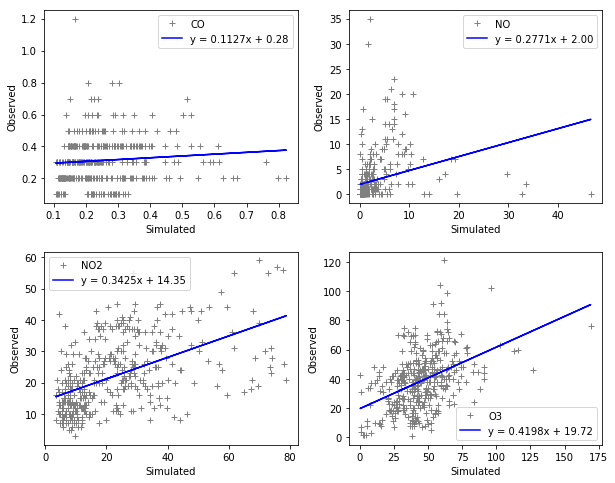

In [58]:
fig=plt.figure(figsize=(10,8))
columns = 2
rows = 2
polls = ['co', 'no','no2','o3']

df = data
df.loc[:,'Hour']= data.set_index('local_date').index.hour
hours = [0,1,2,3,4,5,6,7,8,9,10,18,19,20,21,22,23]
df = df[df.Hour.isin(hours)]

for i in range(1, len(polls)+1):
    fig.add_subplot(rows, columns, i)
    x = df.dropna()[polls[i-1]+'_mod'] # modeled
    y = df.dropna()[polls[i-1]+'_obs'] # observed
    plt.plot(x,y,'+',color='gray', label=polls[i-1].upper())
    m, b = np.polyfit(x, y,1) # m = slope; b = intercept
    plt.plot(x, m*x + b, 'b-' ,label='y = {:.4f}x + {:.2f}'.format(m,b))
    plt.xlabel('Simulated')
    plt.ylabel('Observed')
    plt.legend(loc='best')
    fig.subplots_adjust(hspace=0.25)

plt.show()
#############
fig.savefig("../4_Draft_Report/Dissertation/fig/linear_reg.pdf",bbox_inches='tight')

## Time series chart

In [59]:
df = data.set_index(['local_date'])
df.head()

,tc_obs,rh_obs,sr,ws_obs,wd_obs,code,station,o3_obs,no_obs,no2_obs,...,tc_mod,rh_mod,ws_mod,wd_mod,o3_mod,no_mod,no2_mod,co_mod,nox_mod,Hour
local_date,,,,,,,,,,,,,,,,,,,,,
2018-09-05 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó,9.0,NaN,NaN,...,13.118744,78.13063,3.267713,137.773300,28.474050,0.906820,28.511665,0.223527,29.418485,21
2018-09-05 22:00:00-03:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó,8.0,NaN,NaN,...,12.774506,80.67195,3.164190,136.681490,29.017082,0.820379,27.686550,0.219647,28.506929,22
2018-09-05 23:00:00-03:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó,6.0,NaN,NaN,...,12.470947,88.16611,2.962037,128.610780,27.917494,0.813932,28.189354,0.218557,29.003286,23
2018-09-06 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó,16.0,NaN,NaN,...,12.418640,85.67009,3.376392,121.686516,32.607197,0.630725,23.537539,0.191193,24.168264,0
2018-09-06 01:00:00-03:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó,18.0,NaN,NaN,...,12.182648,84.14153,3.311165,119.804380,30.740310,0.678302,26.080936,0.199513,26.759238,1


In [42]:
df.sort_values(by='station').station.unique()

array(['Americana', 'Araraquara', 'Cambuci', 'Campinas-Centro',
       'Campinas-Taquaral', 'Campinas-V.União', 'Capão Redondo',
       'Carapicuíba', 'Centro', 'Cerqueira César',
       'Cid.Universitária-USP-Ipen', 'Congonhas', 'Cubatão-Centro',
       'Cubatão-V.Parisi', 'Cubatão-Vale do Mogi', 'Diadema',
       'Grajaú-Parelheiros', 'Guaratinguetá', 'Guarulhos',
       'Guarulhos-Paço Municipal', 'Guarulhos-Pimentas', 'Ibirapuera',
       'Interlagos', 'Itaim Paulista', 'Itaquera', 'Jacareí', 'Jaú',
       'Jundiaí', 'Limeira', 'Marg.Tietê-Pte Remédios', 'Mauá',
       'Mogi das Cruzes', 'Mooca', 'N.Senhora do Ó', 'Osasco',
       'Parque D.Pedro II', 'Paulínia', 'Paulínia Sul', 'Pico do Jaraguá',
       'Pinheiros', 'Piracicaba', 'Pirassununga-EM', 'S.André-Capuava',
       'S.André-Centro', 'S.André-Paço Municipal', 'S.Bernardo-Centro',
       'S.Bernardo-Paulicéia', 'S.José Campos',
       'S.José Campos-Jd.Satelite', 'S.José Campos-Vista Verde',
       'S.Miguel Paulista', 'San

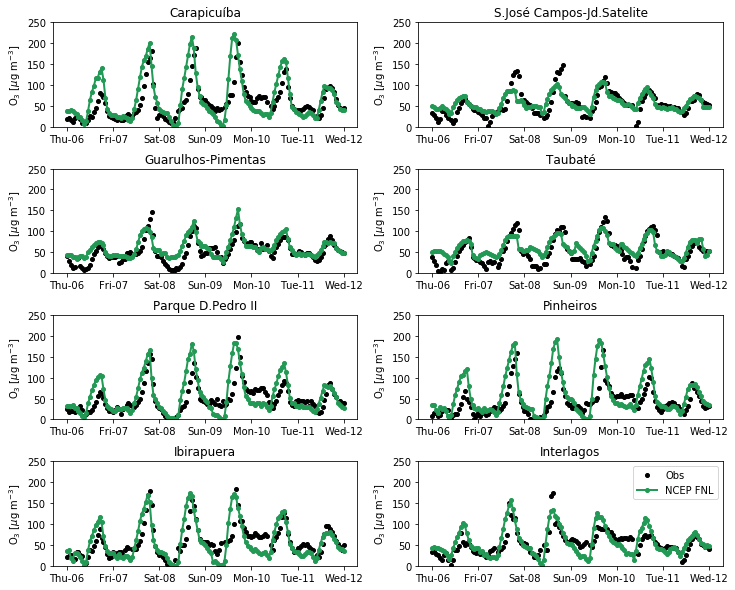

In [43]:
fig=plt.figure(figsize=(12,10))
columns = 2
rows = 4
poll='o3'
pol_label='O$_3$ [$\mu$g m$^{-3}$]'
lim = [0,250] # None
stations = ['Carapicuíba', 'S.José Campos-Jd.Satelite', 
            'Guarulhos-Pimentas', 'Taubaté', 
            'Parque D.Pedro II', 'Pinheiros',
           'Ibirapuera','Interlagos']

#stations = ['Araçatuba', 'Bauru', 
 #           'Marília', 'Presidente Prudente', 
  #          'São José do Rio Preto', 'Catanduva',
   #        'Ribeirão Preto']

#############
for i in range(1, len(stations)+1):
    fig.add_subplot(rows, columns, i)
    da = df[df.station == stations[i-1]][[poll+'_obs',poll+'_mod']]
    plt.plot(da[poll+'_obs'],'ko', label = 'Obs', markersize=4)
    plt.plot(da[poll+'_mod'],'o-', c='#229954', label = 'NCEP FNL',markersize=4, linewidth=2, alpha = 1)
    if i == len(stations):
        plt.legend()
    plt.ylabel(pol_label)
    plt.ylim(lim)
    plt.title(stations[i-1])
    xfmt = md.DateFormatter('%a-%d')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(xfmt)
    fig.subplots_adjust(hspace=0.4)
plt.show()
#############
fig.savefig("../4_Draft_Report/Dissertation/fig/o3_res_d02.pdf",bbox_inches='tight')

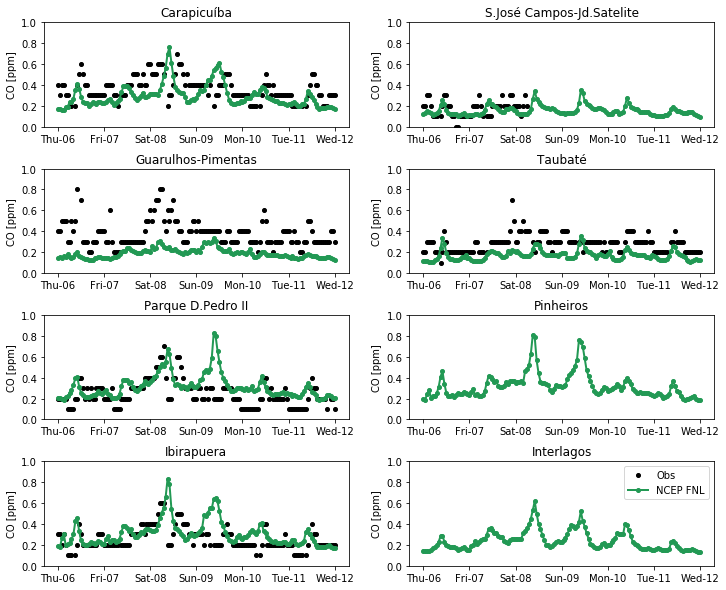

In [44]:
fig=plt.figure(figsize=(12,10))
columns = 2
rows = 4
poll='co'
pol_label='CO [ppm]'
lim = [0,1]
stations = ['Carapicuíba', 'S.José Campos-Jd.Satelite', 
            'Guarulhos-Pimentas', 'Taubaté', 
            'Parque D.Pedro II', 'Pinheiros',
           'Ibirapuera','Interlagos']
#############
for i in range(1, len(stations)+1):
    fig.add_subplot(rows, columns, i)
    da = df[df.station == stations[i-1]][[poll+'_obs',poll+'_mod']]
    plt.plot(da[poll+'_obs'],'ko', label = 'Obs', markersize=4)
    plt.plot(da[poll+'_mod'],'o-', c='#229954', label = 'NCEP FNL',markersize=4, linewidth=2, alpha = 1)
    if i == len(stations):
        plt.legend()
    plt.ylabel(pol_label)
    plt.ylim(lim)
    plt.title(stations[i-1])
    xfmt = md.DateFormatter('%a-%d')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(xfmt)
    fig.subplots_adjust(hspace=0.4)
plt.show()
#############
fig.savefig("../4_Draft_Report/Dissertation/fig/co_res.pdf",bbox_inches='tight')

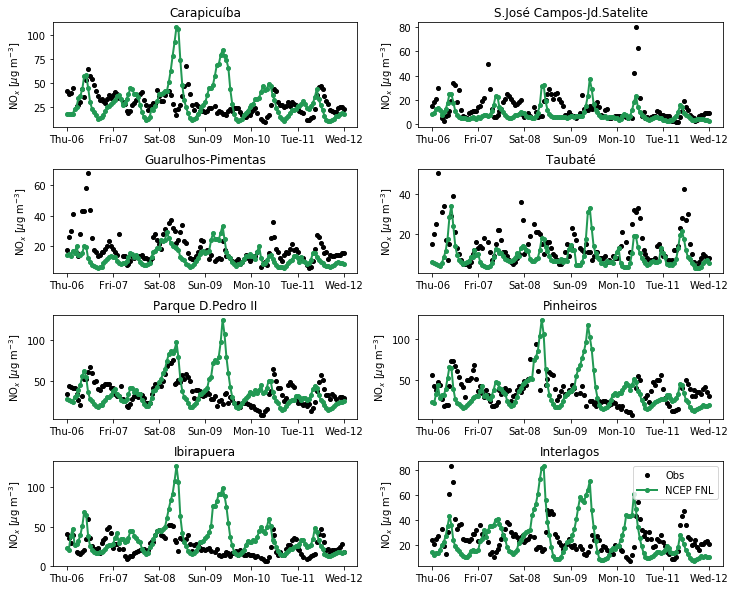

In [60]:
fig=plt.figure(figsize=(12,10))
columns = 2
rows = 4
poll='nox'
pol_label='NO$_x$ [$\mu$g m$^{-3}$]'
lim = None
stations = ['Carapicuíba', 'S.José Campos-Jd.Satelite', 
            'Guarulhos-Pimentas', 'Taubaté', 
            'Parque D.Pedro II', 'Pinheiros',
           'Ibirapuera','Interlagos']
#############
for i in range(1, len(stations)+1):
    fig.add_subplot(rows, columns, i)
    da = df[df.station == stations[i-1]][[poll+'_obs',poll+'_mod']]
    plt.plot(da[poll+'_obs'],'ko', label = 'Obs', markersize=4)
    plt.plot(da[poll+'_mod'],'o-', c='#229954', label = 'NCEP FNL',markersize=4, linewidth=2, alpha = 1)
    if i == len(stations):
        plt.legend()
    plt.ylabel(pol_label)
    plt.ylim(lim)
    plt.title(stations[i-1])
    xfmt = md.DateFormatter('%a-%d')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(xfmt)
    fig.subplots_adjust(hspace=0.4)
plt.show()
#############
fig.savefig("../4_Draft_Report/Dissertation/fig/nox_res.pdf",bbox_inches='tight')

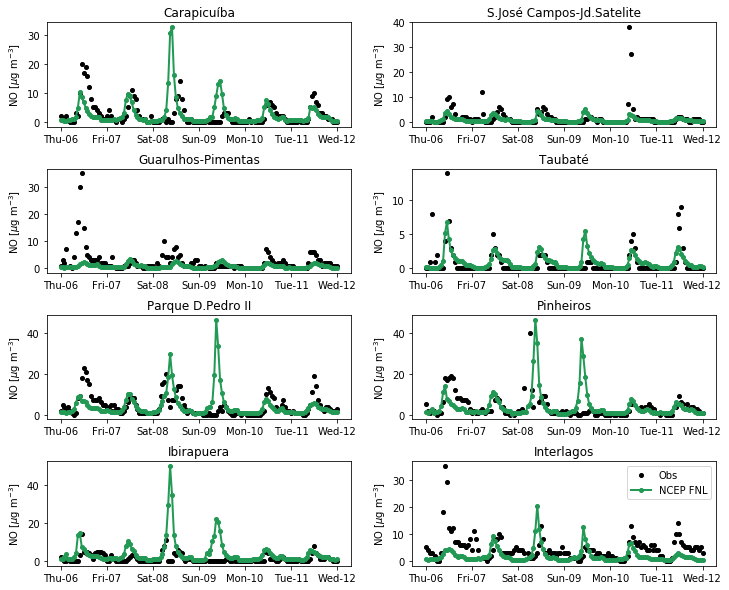

In [45]:
fig=plt.figure(figsize=(12,10))
columns = 2
rows = 4
poll='no'
pol_label='NO [$\mu$g m$^{-3}$]'
lim = None
stations = ['Carapicuíba', 'S.José Campos-Jd.Satelite', 
            'Guarulhos-Pimentas', 'Taubaté', 
            'Parque D.Pedro II', 'Pinheiros',
           'Ibirapuera','Interlagos']
#############
for i in range(1, len(stations)+1):
    fig.add_subplot(rows, columns, i)
    da = df[df.station == stations[i-1]][[poll+'_obs',poll+'_mod']]
    plt.plot(da[poll+'_obs'],'ko', label = 'Obs', markersize=4)
    plt.plot(da[poll+'_mod'],'o-', c='#229954', label = 'NCEP FNL',markersize=4, linewidth=2, alpha = 1)
    if i == len(stations):
        plt.legend()
    plt.ylabel(pol_label)
    plt.ylim(lim)
    plt.title(stations[i-1])
    xfmt = md.DateFormatter('%a-%d')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(xfmt)
    fig.subplots_adjust(hspace=0.4)
plt.show()
#############
fig.savefig("../4_Draft_Report/Dissertation/fig/no_res.pdf",bbox_inches='tight')

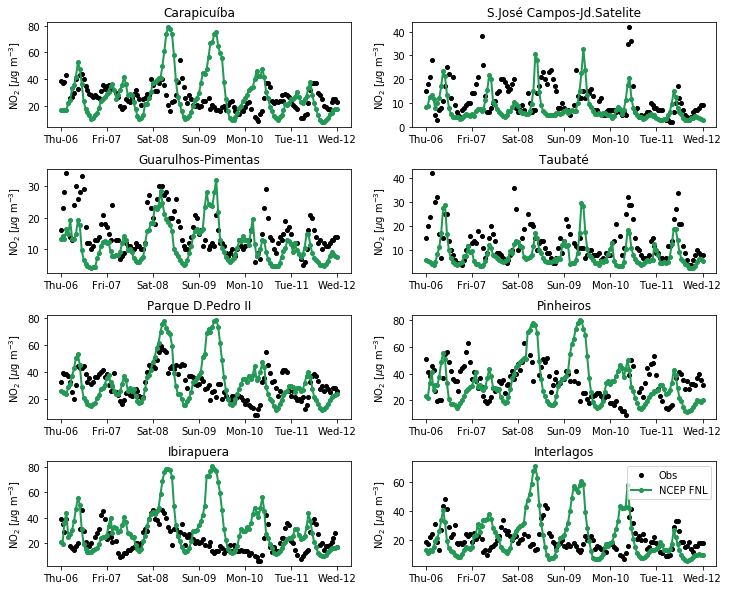

In [46]:
fig=plt.figure(figsize=(12,10))
columns = 2
rows = 4
poll='no2'
pol_label='NO$_2$ [$\mu$g m$^{-3}$]'
lim = [0,100]
stations = ['Carapicuíba', 'S.José Campos-Jd.Satelite', 
            'Guarulhos-Pimentas', 'Taubaté', 
            'Parque D.Pedro II', 'Pinheiros',
           'Ibirapuera','Interlagos']
#############
for i in range(1, len(stations)+1):
    fig.add_subplot(rows, columns, i)
    da = df[df.station == stations[i-1]][[poll+'_obs',poll+'_mod']]
    plt.plot(da[poll+'_obs'],'ko', label = 'Obs', markersize=4)
    plt.plot(da[poll+'_mod'],'o-', c='#229954', label = 'NCEP FNL',markersize=4, linewidth=2, alpha = 1)
    if i == len(stations):
        plt.legend()
    plt.ylabel(pol_label)
    #plt.ylim(lim)
    plt.title(stations[i-1])
    xfmt = md.DateFormatter('%a-%d')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(xfmt)
    #plt.yticks(np.arange(0, da[poll+'_obs'].max()+15, 15), fontsize=7)
    fig.subplots_adjust(hspace=0.4)
plt.show()
#############
fig.savefig("../4_Draft_Report/Dissertation/fig/no2_res.pdf",bbox_inches='tight')

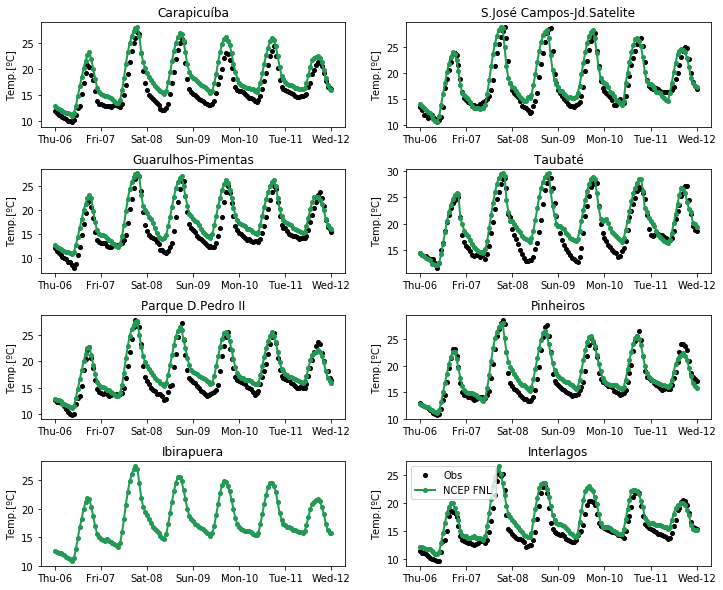

In [47]:
fig=plt.figure(figsize=(12,10))
columns = 2
rows = 4
poll='tc'
pol_label='Temp.[ºC]'
lim = [0,100]
stations = ['Carapicuíba', 'S.José Campos-Jd.Satelite', 
            'Guarulhos-Pimentas', 'Taubaté', 
            'Parque D.Pedro II', 'Pinheiros',
           'Ibirapuera','Interlagos']
#############
for i in range(1, len(stations)+1):
    fig.add_subplot(rows, columns, i)
    da = df[df.station == stations[i-1]][[poll+'_obs',poll+'_mod']]
    plt.plot(da[poll+'_obs'],'ko', label = 'Obs', markersize=4)
    plt.plot(da[poll+'_mod'],'o-', c='#229954', label = 'NCEP FNL',markersize=4, linewidth=2, alpha = 1)
    if i == len(stations):
        plt.legend()
    plt.ylabel(pol_label)
    #plt.ylim(lim)
    plt.title(stations[i-1])
    xfmt = md.DateFormatter('%a-%d')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(xfmt)
    #plt.yticks(np.arange(0, da[poll+'_obs'].max()+15, 15), fontsize=7)
    fig.subplots_adjust(hspace=0.4)
plt.show()
fig.savefig("../4_Draft_Report/Dissertation/fig/tc_res.pdf",bbox_inches='tight')

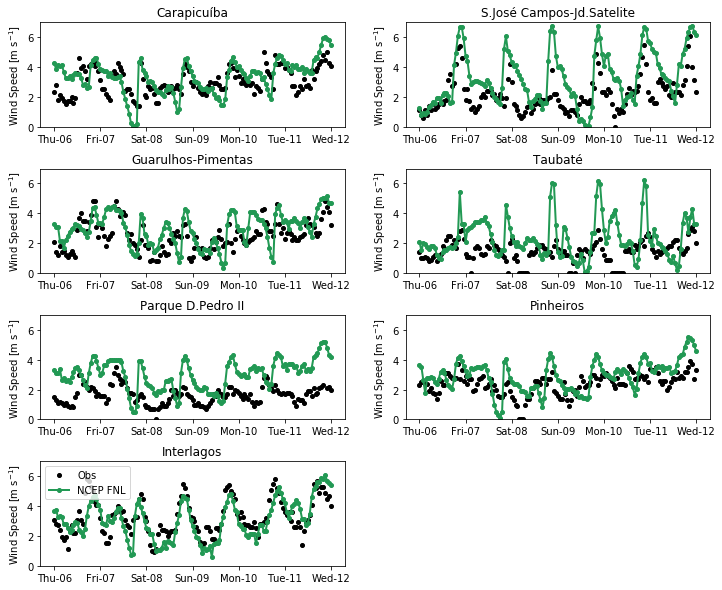

In [50]:
fig=plt.figure(figsize=(12,10))
columns = 2
rows = 4
poll='ws'
pol_label='Wind Speed [m s$^{-1}$]'
lim = [0,7]
stations = ['Carapicuíba', 'S.José Campos-Jd.Satelite', 
            'Guarulhos-Pimentas', 'Taubaté', 
            'Parque D.Pedro II', 'Pinheiros',
           #'Ibirapuera',
            'Interlagos']
#############
for i in range(1, len(stations)+1):
    fig.add_subplot(rows, columns, i)
    da = df[df.station == stations[i-1]][[poll+'_obs',poll+'_mod']]
    plt.plot(da[poll+'_obs'],'ko', label = 'Obs', markersize=4)
    plt.plot(da[poll+'_mod'],'o-', c='#229954', label = 'NCEP FNL',markersize=4, linewidth=2, alpha = 1)
    if i == len(stations):
        plt.legend()
    plt.ylabel(pol_label)
    plt.ylim(lim)
    plt.title(stations[i-1])
    xfmt = md.DateFormatter('%a-%d')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(xfmt)
    #plt.yticks(np.arange(0, da[poll+'_obs'].max()+15, 15), fontsize=7)
    fig.subplots_adjust(hspace=0.4)
plt.show()
fig.savefig("../4_Draft_Report/Dissertation/fig/ws_res.pdf",bbox_inches='tight')

## Windrose Plot

In [64]:
from windrose import plot_windrose
from windrose import WindroseAxes
import matplotlib.cm as cm

In [76]:
met = ['Taubaté', 'Parque D.Pedro II',
       'Pinheiros']
for i in met:
    print(i)
    print(df[df.station == i].isna())

Taubaté
                           tc_obs  rh_obs     sr  ws_obs  wd_obs   code  \
local_date                                                                
2018-09-05 21:00:00-03:00   False   False  False   False   False  False   
2018-09-05 22:00:00-03:00   False   False  False   False   False  False   
2018-09-05 23:00:00-03:00   False   False  False   False   False  False   
2018-09-06 00:00:00-03:00   False   False  False   False   False  False   
2018-09-06 01:00:00-03:00   False   False  False   False   False  False   
...                           ...     ...    ...     ...     ...    ...   
2018-09-11 17:00:00-03:00   False   False  False   False   False  False   
2018-09-11 18:00:00-03:00   False   False  False   False   False  False   
2018-09-11 19:00:00-03:00   False   False  False   False   False  False   
2018-09-11 20:00:00-03:00   False   False  False   False   False  False   
2018-09-11 21:00:00-03:00   False   False  False   False   False  False   

                

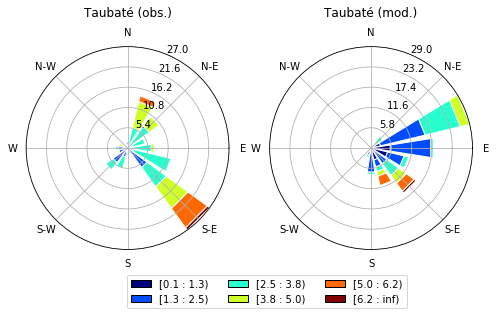

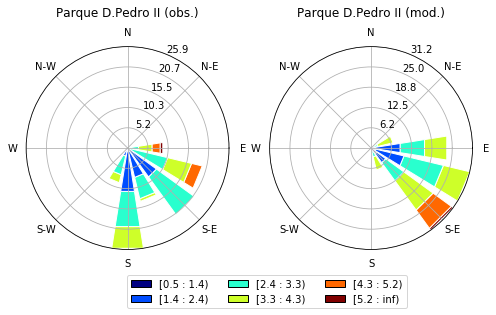

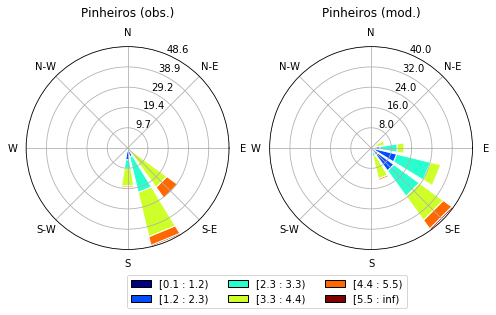

In [78]:
met = ['Taubaté', 'Parque D.Pedro II',
       'Pinheiros']

for site in met:
    wind = df[df.station == site][['ws_obs','wd_obs','ws_mod','wd_mod']].dropna()
    fig = plt.figure(figsize=(8,6))
    ax1 = fig.add_subplot(1, 2, 1, projection='windrose')
    ax1.bar(wind['wd_obs'], wind['ws_obs'], normed=True, opening=0.8, edgecolor='white')
    ax1.set_title(site+' (obs.)',pad=20)
    ax2 = fig.add_subplot(1, 2, 2, projection='windrose')
    ax2.bar(wind['wd_mod'], wind['ws_mod'], normed=True, opening=0.8, edgecolor='white')
    ax2.set_title(site +' (mod.)', pad=20)
    plt.legend(loc='best',bbox_to_anchor=(0.7, -0.1), ncol = 3)
    fig.savefig("../4_Draft_Report/Dissertation/fig/wd_"+site+".pdf",bbox_inches='tight')
    plt.show()

In [ ]:
    nrows, ncols = 2, 3
    fig = plt.figure(figsize=(12,9))
    

    #fig.suptitle("Wind speed - %d")
    for i in range(1, 7):
        ax = fig.add_subplot(nrows, ncols, i, projection='windrose')
        title = sitesNames[i-1]
        ax.set_title(title, pad = 20)
        try:
            wind = df[df.station == sitesNames[i-1]]
        except KeyError:
            continue
        direction = wind['wd'].values
        var = wind['ws'].values
        ax.bar(direction, var, bins=bins, normed = True, cmap=cm.Paired, edgecolor='white')
plt.legend(loc='best', bbox_to_anchor=(0.7, -0.1), ncol = 6)

In [20]:
# Review this later

pols_ugm3={'no':'darkorange','no2':'r','o3':'b'}
pols_ppm={'co':'g'}
pols={**pols_ugm3,**pols_ppm}.keys()
Obs['hour']=Obs.index.hour
Mod['hour']=Mod.index.hour
obs = Obs.groupby(['hour']).mean()[pols]
mod = Mod.groupby(['hour']).mean()[pols]

def chart(obs=obs,mod=mod, save = True, title = False, title_name = 'name',
          path='../4_Draft_Report/Dissertation/fig/pols_fnl.pdf'):
    fig= plt.figure(figsize=(10,6))
    ax1 = fig.gca()
    plt.xticks(np.arange(0,24,1))
    ax1.tick_params(axis="x", direction="in",length=3, width=1, colors='gray')
    ax1.tick_params(axis="y", direction="in",length=3, width=1, colors='gray')
    ax1.grid(False)
    for pol,col in pols_ugm3.items():
        ax1.plot(obs.index,obs[pol], color=col,
                 label=pol.upper()+' (obs)',lw=3, marker='o')
        ax1.plot(mod.index,mod[pol], color=col, 
                 label=pol.upper()+' (mod)',lw=1, marker='x')
        ax1.set_ylabel('1-hr mean of surface Ozone, NO and NO$_2$ ($\mu$g m$^{-3}$)')
        ax1.legend(loc='upper left', ncol = 3)
    for pol_2,col in pols_ppm.items():
        ax2 = ax1.twinx()
        ax2.yaxis.label.set_color(col)
        ax2.plot(obs.index,obs[pol_2], color=col, 
                 label= pol_2.upper()+' (obs)',lw=3,marker='o')
        ax2.plot(mod.index,mod[pol_2], color=col, 
                 label= pol_2.upper()+' (obs)',lw=1,marker='x')
        ax2.legend(loc='best', ncol = 3)
        ax2.set_ylim(0.0, 1.0)
        ax2.set_ylabel(pol_2+' (ppm)')
        ax1.set_xlabel('Hour of the day (local time) for '+
                       obs_df.index.strftime('%B, %Y').unique().values[0])
    if title:
        plt.title(title_name)
    else:
        pass
    if save:
        fig.savefig(path,bbox_inches='tight')
    else:
        pass
    

def Hourplot(obsData=Obs, modData=Mod, title = False,
             pols_ugm3={'no':'darkorange','no2':'r','o3':'b'},
             pols_ppm={'co':'g'}, by_station=False, save = True, 
             path='../4_Draft_Report/Dissertation/fig/'):
    pols={**pols_ugm3,**pols_ppm}.keys()
    if by_station:
        for i in obsData.name.unique():
            obs = obsData[obsData.name==i].groupby(['hour']).mean()[pols]
            mod = modData[modData.name==i].groupby(['hour']).mean()[pols]
            chart(obs=obs, mod=mod, save = save, title = title,title_name = i,
                  path= path+"".join(e[0:2] for e in i.split())+'_pol.pdf')
            
    else:
        obsData['hour']=obsData.index.hour
        modData['hour']=modData.index.hour
        obs = obsData.groupby(['hour']).mean()[pols]
        mod = modData.groupby(['hour']).mean()[pols]
        chart(obs=obs,mod=mod, save = save, path = path+'mean_pol.pdf')
    
Hourplot(obsData=obs_df, modData=model_df,
         pols_ugm3={'no':'darkorange','no2':'r','o3':'b'},
         pols_ppm={'co':'g'}, by_station=False, 
         save = True, path = '../4_Draft_Report/Dissertation/fig/');


AttributeError: 'Int64Index' object has no attribute 'hour'

In [ ]:
mpl.rcParams.update({'figure.max_open_warning': 0})
Hourplot(obsData=obs_df, 
         modData=model_df, 
         pols_ugm3={'no':'darkorange','no2':'r','o3':'b'},
         pols_ppm={'co':'g'}, 
         by_station=True,
         title = True,
         save = False,
         path='../4_Draft_Report/Dissertation/fig/')


In [ ]:
fig = plt.figure(figsize=(8,5))
for i in obs_df.name.unique():
    obs = obs_df[obs_df.name==i].groupby(['hour']).mean()[['co','no','no2','o3']]
    plt.plot(obs.index,obs.o3,  label=i,lw=3,
            alpha=0.5)
    
Mean = model_df.groupby(['hour']).mean()[['co','no','no2','o3']]
Max = model_df.groupby(['hour']).max()[['co','no','no2','o3']]
Min = model_df.groupby(['hour']).min()[['co','no','no2','o3']]

dy_up=Max-Mean
dy_down=Mean - Min
# Usar la desviación estándar

plt.errorbar(Mean.index, Mean.o3,yerr=[dy_up.o3,dy_down.o3],fmt='-o',color='black',
            capsize=5, lw=3,label = 'WRF-Chem (NCEP-FNL)')
plt.plot(obs.index, Mean.o3,'-k',lw=3,label = 'Mean (WRF-Chem/NCEP-FNL)')
plt.fill_between(obs.index, Max.o3, Min.o3, color='k', alpha=0.2)
plt.xticks(np.arange(0,24,1))
plt.ylabel('1-hr Ozone ($\mu$g.m$^{-3}$)')
plt.xlabel('Local Time (' +obs_df.index.strftime('%B, %Y').unique().values[0]+")")
plt.legend()
fig.savefig("../4_Draft_Report/Dissertation/fig/o3_fnl.pdf",bbox_inches='tight');